In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# This dataset is created for prediction of the S&P 500 stock index based on the interest rates and employment numbers
stock = pd.read_csv('Stock.CSV')

In [4]:
stock.tail(10)

,Interest Rates,Employment,S&P 500 Price
990,2.018200,56.929616,2206.946180
991,1.936748,52.967524,2086.159182
992,2.591529,57.281030,2686.211789
993,1.740441,55.098645,1922.893274
994,1.868835,60.543377,2065.424594
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [5]:
stock.head(10)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [6]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


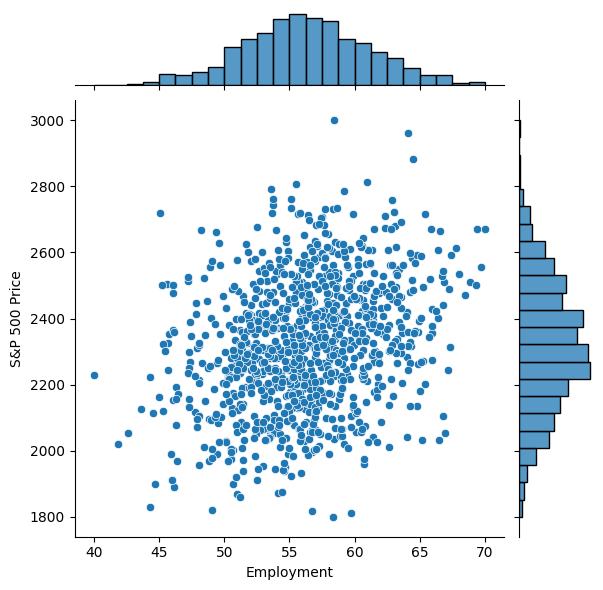

In [10]:
# visualizing dataset
sns.jointplot(x = 'Employment', y = 'S&P 500 Price', data = stock )

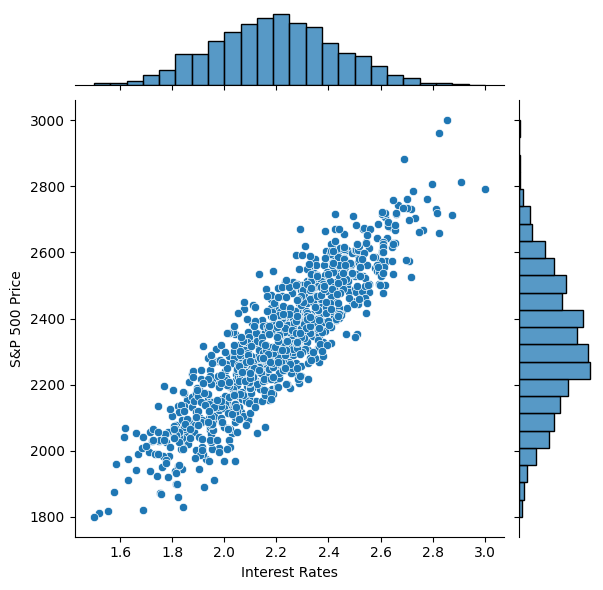

In [11]:
sns.jointplot(x = 'Interest Rates', y = 'S&P 500 Price', data = stock )

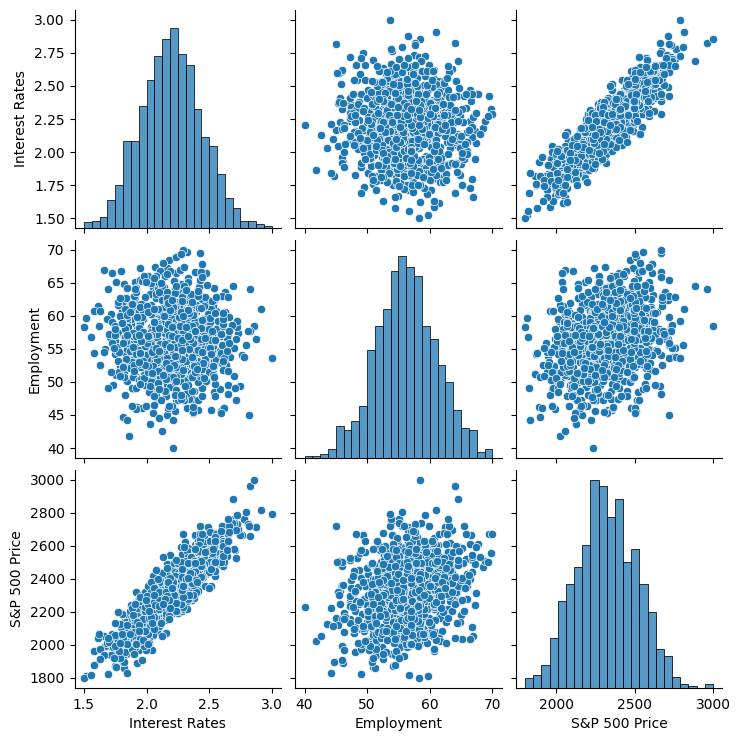

In [12]:
sns.pairplot(stock)

In [20]:
# training and testing data

Y = stock['S&P 500 Price']
Y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
          ...     
995    2578.699184
996    2573.865933
997    2004.911218
998    2344.098981
999    2156.133786
Name: S&P 500 Price, Length: 1000, dtype: float64

In [21]:
X = stock[['Interest Rates','Employment']]
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
...,...,...
995,2.528420,52.390828
996,2.643571,54.626204
997,2.009644,57.004357
998,2.201656,62.447790


In [23]:
# split dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)


In [24]:
X_train

,Interest Rates,Employment
21,1.751579,54.148256
511,2.098053,59.074050
321,1.991110,49.500100
687,2.378782,59.229882
238,2.115801,57.470353
...,...,...
376,2.096176,60.375521
31,2.234972,66.430798
403,2.307734,63.440607
57,2.326111,58.052252


In [25]:
y_train

21     1871.361622
511    2188.320015
321    2083.726913
687    2390.432134
238    2326.787663
          ...     
376    2344.194806
31     2400.838075
403    2467.402219
57     2473.534512
806    2579.375796
Name: S&P 500 Price, Length: 800, dtype: float64

In [26]:
X_test

,Interest Rates,Employment
491,1.500000,58.323993
464,2.137105,54.704067
340,1.752746,65.160526
594,2.064196,54.817290
848,2.036101,57.563727
...,...,...
190,2.059659,59.860231
570,2.209165,54.426772
710,2.538991,52.381327
672,2.307061,55.819913


In [27]:
y_test

491    1800.000000
464    2246.840687
340    2032.672119
594    2266.331580
848    2318.948444
          ...     
190    2161.306722
570    2220.274957
710    2461.727516
672    2341.632103
29     2301.183322
Name: S&P 500 Price, Length: 200, dtype: float64

In [28]:
# training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)



In [29]:
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [727.24438298  12.47412906]
Linear Model Coefficient (b):  20.170709990436535


In [33]:
y_predict = regressor.predict(X_test)
y_predict

array([1838.57830436, 2256.75374416, 2107.66591509, 2205.14395588,
       2218.97087583, 2370.3662361 , 2164.13005707, 2630.28558031,
       2322.98977321, 2629.8539102 , 1994.1267824 , 2151.82275867,
       2718.17035763, 2005.80390921, 1992.1548214 , 2223.614607  ,
       2278.43565065, 2484.52998849, 2573.40149216, 2573.50493622,
       2230.46861419, 2253.45349283, 2273.05917123, 2531.7560549 ,
       2051.27281675, 2241.71311317, 2360.96200415, 2585.50792493,
       2161.92412819, 2311.63559871, 2671.94826994, 2425.40683506,
       1919.06705907, 2462.32241227, 2499.3498749 , 2640.06560487,
       2280.49514387, 2226.60557894, 2400.7682689 , 2498.1317899 ,
       2210.94877516, 2435.75081088, 2332.34396799, 2730.09018364,
       2367.23896619, 2286.03024221, 2352.21820286, 2283.75421575,
       2432.00799565, 2285.56408759, 2642.51176087, 2166.63874361,
       2388.10547529, 2086.17717927, 2319.18482658, 2037.18993017,
       2460.93506378, 2212.83037895, 2515.65420227, 2056.58965

In [34]:
y_test

491    1800.000000
464    2246.840687
340    2032.672119
594    2266.331580
848    2318.948444
          ...     
190    2161.306722
570    2220.274957
710    2461.727516
672    2341.632103
29     2301.183322
Name: S&P 500 Price, Length: 200, dtype: float64

Text(0.5, 1.0, 'Multiple Linear Regression Prediction')

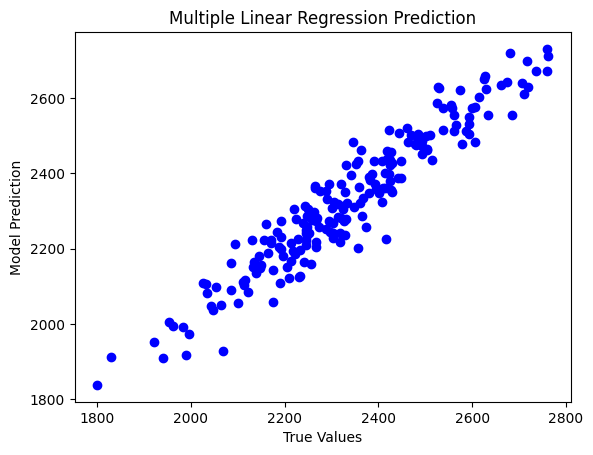

In [36]:
# visualizing the predicted dataset vs the true dataset
plt.scatter(y_test,y_predict, color = 'blue')
plt.ylabel('Model Prediction')
plt.xlabel('True Values')
plt.title('Multiple Linear Regression Prediction')


In [37]:
k = X_test.shape[1] # 2 independent variables
n = len(X_test)

In [38]:
k

2

In [39]:
n

200

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

#Root mean square error
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)), '.3f')) 

# Mean square error
MSE = mean_squared_error(y_test,y_predict)
# mean absolute error
MAE = mean_absolute_error(y_test,y_predict)
#r squared
r2 = r2_score(y_test,y_predict)
# adjusted r2
adj_r2 = 1 -(1-r2) * (n-1)/(n-k-1)
# Mean absolute percentage error
MAPE = np.mean(np.abs((y_test-y_predict)/ y_test)) * 100

In [53]:
print('RMSE = ',RMSE, '\nMSE = ',MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nadj_r2 = ',adj_r2, '\nMAPE = ', MAPE )

RMSE =  58.12 
MSE =  3377.8962389134954 
MAE =  46.28205422031111 
r2 =  0.907882027919888 
adj_r2 =  0.9069468200815113 
MAPE =  1.9882902063887504


In [54]:
from mpl_toolkits.mplot3d import Axes3D


In [58]:
# creating a meshgrid
x_surf, y_surf = np.meshgrid(np.linspace(stock['Interest Rates'].min(),stock['Interest Rates'].max(),100),np.linspace(stock['Employment'].min(),stock['Employment'].max(), 100))

In [59]:
x_surf.shape

(100, 100)

In [60]:
y_surf.shape

(100, 100)

In [61]:
onlyX = pd.DataFrame({'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()})

In [62]:
onlyX.shape

(10000, 2)

In [63]:
fittedY = regressor.predict(onlyX)

In [66]:
fittedY = fittedY.reshape(x_surf.shape)
fittedY.shape

(100, 100)

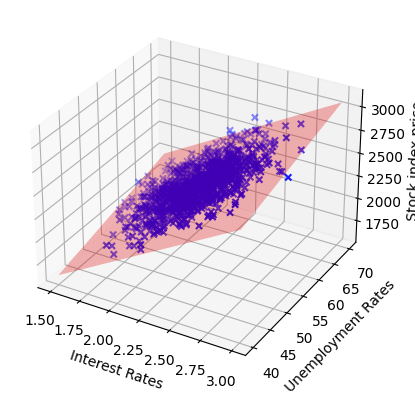

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'],stock['S&P 500 Price'], c = 'blue', marker = 'x')
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')
plt.show()

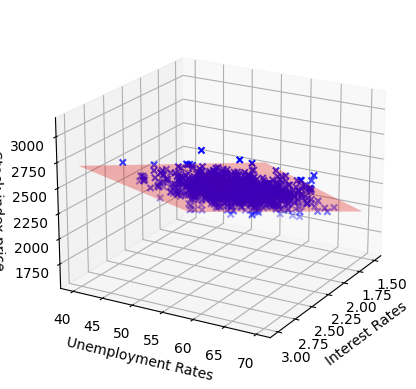

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'],stock['S&P 500 Price'], c = 'blue', marker = 'x')
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')
ax.view_init(20,30)
plt.show()

In [75]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,727.244383
Employment,12.474129
